In [1]:
import os
import pandas as pd

path = "E:\mini project"
  

os.chdir(path)
df_train = pd.read_table('drugsComTrain_raw.tsv')
df_test = pd.read_table('drugsComTest_raw.tsv')


df_main = pd.concat([df_train, df_test], axis=0)
df_main = df_train
df_main.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [2]:
def rank_bin(array):
  y_rank = []
  for i in array:
    if i <= 4: # Negative Rating 
      y_rank.append(0)
    elif i >= 7: # Positive Rating 
      y_rank.append(1)
    else:  # Neutral Rating Cut off 
      y_rank.append(2)
  return y_rank

df_main["rank_bin"] = rank_bin(df_main["rating"])
df_main.rank_bin.value_counts()

1    106866
0     40075
2     14356
Name: rank_bin, dtype: int64

In [3]:
df_main[df_main["condition"].str.contains("</span>",na=False)].head(4)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rank_bin
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3.0,"November 3, 2010",2,0
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1.0,"March 27, 2016",4,0
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3.0,"June 1, 2010",3,0
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2.0,"June 24, 2014",4,0


In [4]:
df_main['text'] = df_main[['review']]
#df_main['rank_bin'].columns = ['class_label']
df_main.rename(columns={'rank_bin':'class_label'}, inplace=True)
df_main.head(3)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,class_label,text
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1,"""It has no side effect, I take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1,"""My son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,2,"""I used to take another oral contraceptive, wh..."


In [5]:

df_main.tail(3)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,class_label,text
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35,0,"""Limited improvement after 4 months, developed..."
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79,1,"""I&#039;ve been on thyroid medication 49 years..."
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9.0,"December 13, 2014",116,1,"""I&#039;ve had chronic constipation all my adu..."


In [6]:

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"(\d)", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

df_clean_text = standardize_text(df_main, "text")


df_clean_text.to_csv("clean_data.csv")
print('Saved file clean_data.csv to your local drive')



df_clean_text.head(3)

Saved file clean_data.csv to your local drive


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,class_label,text
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1,"""my son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,2,"""i used to take another oral contraceptive, wh..."


In [7]:
df_clean_text = pd.read_csv("clean_data.csv")
df_clean_text.tail(4)

,Unnamed: 0,Unnamed: 0.1,drugName,condition,review,rating,date,usefulCount,class_label,text
161293,161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34,0,"""i was given this in iv before surgey i immed..."
161294,161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35,0,"""limited improvement after months, developed ..."
161295,161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79,1,"""i ve been on thyroid medication years, i s..."
161296,161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9.0,"December 13, 2014",116,1,"""i ve had chronic constipation all my adult ..."


In [8]:
df_clean_text.groupby("class_label").count()

,Unnamed: 0,Unnamed: 0.1,drugName,condition,review,rating,date,usefulCount,text
class_label,,,,,,,,,
0,40075,40075,40075,39828,40075,40075,40075,40075,40075
1,106866,106866,106866,106310,106866,106866,106866,106866,106866
2,14356,14356,14356,14260,14356,14356,14356,14356,14356


85.25610885029977
180
Max sentence length is 180


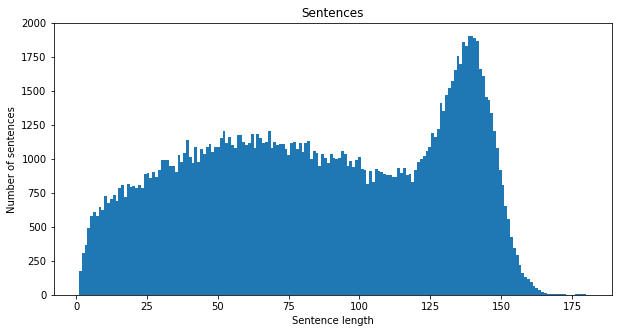

In [135]:
df_clean_text = df_clean_text.loc[df_clean_text["strlen"] <= 180]
print(df_clean_text['text'].str.split().str.len().mean())
print(df_clean_text['text'].str.split().str.len().max())
print("Max sentence length is %s" % max(df_clean_text["strlen"]))



import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.title('Sentences')
plt.hist(df_clean_text["strlen"], bins=180)
plt.show()

In [10]:


_a = df_clean_text.loc[df_clean_text["strlen"] >= 1000].strlen.count()
_b = df_clean_text.loc[df_clean_text["strlen"] >= 750].strlen.count()
_c = df_clean_text.loc[df_clean_text["strlen"] >= 250].strlen.count()
_d = df_clean_text.loc[df_clean_text["strlen"] >= 180].strlen.count()
_e = df_clean_text.loc[df_clean_text["strlen"] >= 100].strlen.count()
_f = df_clean_text.loc[df_clean_text["strlen"] < 100].strlen.count()
print (" # of Reviews by Length \n %s >1000 words \n %s >750 words \n %s >250 words \n %s >180 words \n %s >100 words \n %s <100 words\n" % (_a,_b,_c,_d,_e,_f))

 # of Reviews by Length 
 5 >1000 words 
 10 >750 words 
 171 >250 words 
 347 >180 words 
 66388 >100 words 
 94909 <100 words



In [11]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df_clean_text["tokens"] = df_clean_text["text"].apply(tokenizer.tokenize)
df_clean_text.head()

,Unnamed: 0,Unnamed: 0.1,drugName,condition,review,rating,date,usefulCount,class_label,text,strlen,tokens
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1,"""it has no side effect, i take it in combinati...",16,"[it, has, no, side, effect, i, take, it, in, c..."
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1,"""my son is halfway through his fourth week of ...",142,"[my, son, is, halfway, through, his, fourth, w..."
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,2,"""i used to take another oral contraceptive, wh...",135,"[i, used, to, take, another, oral, contracepti..."
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1,"""this is my first time using any form of birth...",88,"[this, is, my, first, time, using, any, form, ..."
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1,"""suboxone has completely turned my life around...",130,"[suboxone, has, completely, turned, my, life, ..."


In [12]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def remove_non_ascii(words):
    
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
   
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
   
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words
  

In [14]:
words_common = "20k.txt"

words_common = [line.strip() for line in open("20k.txt", 'r')]
print ("loaded words_common")

loaded words_common


In [15]:
import re, string, unicodedata
import inflect
drugs = df_clean_text["drugName"].value_counts()
drugs = drugs.reset_index()

# Run re standardization drug name text
drugs = standardize_text(drugs, 'index')
drugs = drugs['index'].tolist()

# Run normalization on drug names
drugs = normalize(drugs)
drugs = pd.DataFrame(drugs, columns=['name'])

# Tokenize names and combine in
drugs['name'] = drugs['name'].apply(tokenizer.tokenize)
drugs = [word for tokens in drugs['name'] for word in tokens]
print("Tokenized: ",len(drugs))
#print(all_drugs)

# Check drug names and remove any common words (google 20k most common)
drugs_cleaned = [token for token in drugs if token not in words_common]
print("Cleaned: ",len(drugs_cleaned))



drugs = pd.DataFrame(drugs_cleaned, columns=['name'])
drugs = drugs['name'].value_counts()
drugs = drugs.rename_axis('names').reset_index()
drugs = drugs["names"].tolist()
print("Cleaned and de-duped: ",len(drugs))

drug_stopwords = drugs
drugs_stop = pd.DataFrame(drug_stopwords, columns=['drugs_stopwords'])
drugs_stop[0:20]

Tokenized:  5053
Cleaned:  3860
Cleaned and de-duped:  2879


,drugs_stopwords
0,acetaminophen
1,pseudoephedrine
2,phenylephrine
3,estradiol
4,dextromethorphan
5,codeine
6,hydrochlorothiazide
7,chlorpheniramine
8,metformin
9,ethinyl


In [16]:
print ("NLTK stopword list length: ",len(stopwords),'words')
stopwords.extend(drug_stopwords)
print ("Added custom stopwords")
print ("New stopword list length: ",len(stopwords),'words')

NLTK stopword list length:  179 words
Added custom stopwords
New stopword list length:  3058 words


In [17]:
all_words = [word for tokens in df_clean_text["tokens"] for word in tokens]
df_clean_text["tokens_len"] = [len(tokens) for tokens in df_clean_text["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s tokens in total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(df_clean_text["strlen"]))

13678090 tokens in total, with a vocabulary size of 46034
Max sentence length is 1941


In [18]:

from tqdm import tqdm


df_clean_text['old_tokens'] = df_clean_text["tokens"]
df_clean_text['tokens'] = [normalize(token) for token in tqdm(df_clean_text["tokens"])]

 
df_clean_text.to_csv("cleaned_normalized_data.csv")
print('Uploaded file clean_data.csv')



100%|█████████████████████████████████████████████████████████████████████████| 161297/161297 [04:49<00:00, 557.34it/s]


Uploaded file clean_data.csv


In [19]:
cleaned_words = [word for tokens in df_clean_text["tokens"] for word in tokens]
df_clean_text["tokens_len"] = [len(tokens) for tokens in df_clean_text["tokens"]]
cleanedVOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(cleaned_words), len(cleanedVOCAB)))
print("Max sentence length is %s" % max(df_clean_text["strlen"]))
print("We got rid of {} words, or {:2.3f}% of the total token count".format((len(all_words)-len(cleaned_words)),(len(cleaned_words) / len(all_words)*100)))

6336754 words total, with a vocabulary size of 46034
Max sentence length is 1941
We got rid of 7341336 words, or 46.328% of the total token count


In [20]:
# See how the words change

print ("our words before cleaning")
# See some of the words left in our vocab. 
df_words = []
df_words = pd.DataFrame(all_words)
u = df_words[0].value_counts()
print(u.head(5), u.tail(5))

# See some of the words left in our vocab. 

print ("\nour words after cleaning")
df_words = []
df_words = pd.DataFrame(cleaned_words)
u = df_words[0].value_counts()
print(u.head(5), u.tail(5))

our words before cleaning
i      856441
and    431817
the    407230
to     322979
it     317849
Name: 0, dtype: int64 exfoliated     1
confusions     1
hyperlasia     1
vunerable      1
practicable    1
Name: 0, dtype: int64

our words after cleaning
day       57903
side      53581
taking    51306
years     46888
pain      45704
Name: 0, dtype: int64 fertilisation    1
naevus           1
oopsie           1
repierced        1
trapeze          1
Name: 0, dtype: int64


In [114]:
df_clean_text = pd.read_csv("cleaned_normalized_data.csv")
df_clean_list = pd.DataFrame(df_clean_text["tokens"])
df_clean_list = df_clean_text.tokens.tolist()
print (df_clean_text["class_label"].values)

[1 1 2 ... 0 1 1]


In [116]:
# Here is where I split the model into test/train sets. 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Defining the vectorizer function. 
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

# Here I define my corpus and lables. These are used throughout all the other models/processes.
list_corpus = df_clean_list
list_labels = df_clean_text["class_label"].values

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.33, 
                                                                                random_state=20)
#0.2,40
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [23]:
X_train

["['suffered', 'anxiety', 'depression', 'life', 'tried', 'many', 'antidepressants', 'mostly', 'ssri', 'without', 'success', 'side', 'effects', 'drugs', 'unbearable', 'mainly', 'acute', 'insomnia', 'panic', 'attacks', 'finally', 'years', 'intermittent', 'mental', 'suffering', 'despite', 'running', 'miles', 'week', 'seeing', 'therapist', 'regular', 'basis', 'primary', 'care', 'physician', 'prescribed', 'miracle', 'drug', 'although', 'weeks', 'already', 'feeling', 'relief', 'major', 'depression', 'started', 'months', 'ago', 'longer', 'suicidal', 'thoughts', 'negative', 'obsessive', 'thinking', 'panic', 'attacks', 'sleep', 'like', 'rock', 'world', 'much', 'brighter', 'feel', 'sense', 'calm', 'contentment', 'happiness']",
 "['best', 'fast', 'acting', 'cough', 'congestion', 'med', 'ever', 'used', 'minimal', 'side', 'effects', 'get', 'better', 'day', 'could', 'feel', 'relief', 'within', 'hour', 'lasted', 'beyond', 'hr', 'dosing', 'medicine', 'first', 'would', 'developed', 'bronchitis', 'sinus

colormapper= {0: 0, 1: 1, 2: 2}


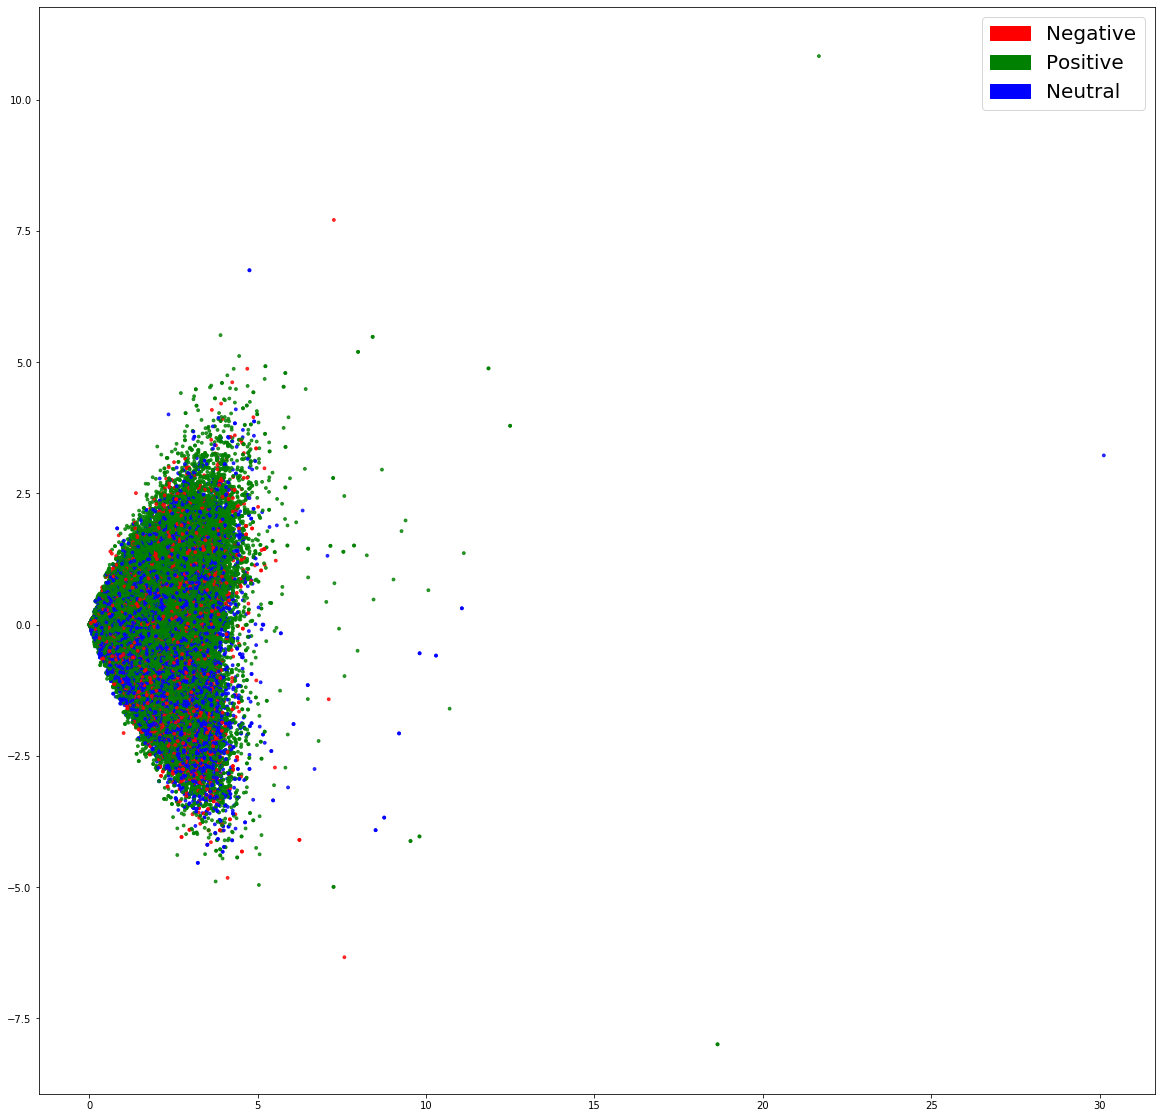

In [110]:


from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2) # Truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        print ('colormapper=',color_mapper)
        
        colors = ['blue','green','red']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='red', label='Negative')
            blue_patch = mpatches.Patch(color='blue', label='Neutral')
            green_patch = mpatches.Patch(color='green', label='Positive')
            plt.legend(handles=[red_patch, green_patch, blue_patch], prop={'size': 20})


fig = plt.figure(figsize=(20, 20))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [117]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30, class_weight='balanced', solver='sag', 
                         multi_class='multinomial', n_jobs=-1, random_state=40, 
                         verbose=1, max_iter = 1000)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

# My first run that completed successfully is below... lol

# convergence after 6022 epochs took 3242 seconds
# [Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 54.0min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 104 seconds


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


In [118]:
from sklearn.metrics import accuracy_score

def get_metrics(y_test, y_predicted):  
   
    
    
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy*100

accuracy = get_metrics(y_test, y_predicted_counts)


print("Accuracy = " ,(accuracy))



Accuracy =  73.84696312160665


In [119]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="OrRd"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=50)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="black", fontsize=20)
    
    plt.tight_layout()
   

    return plt

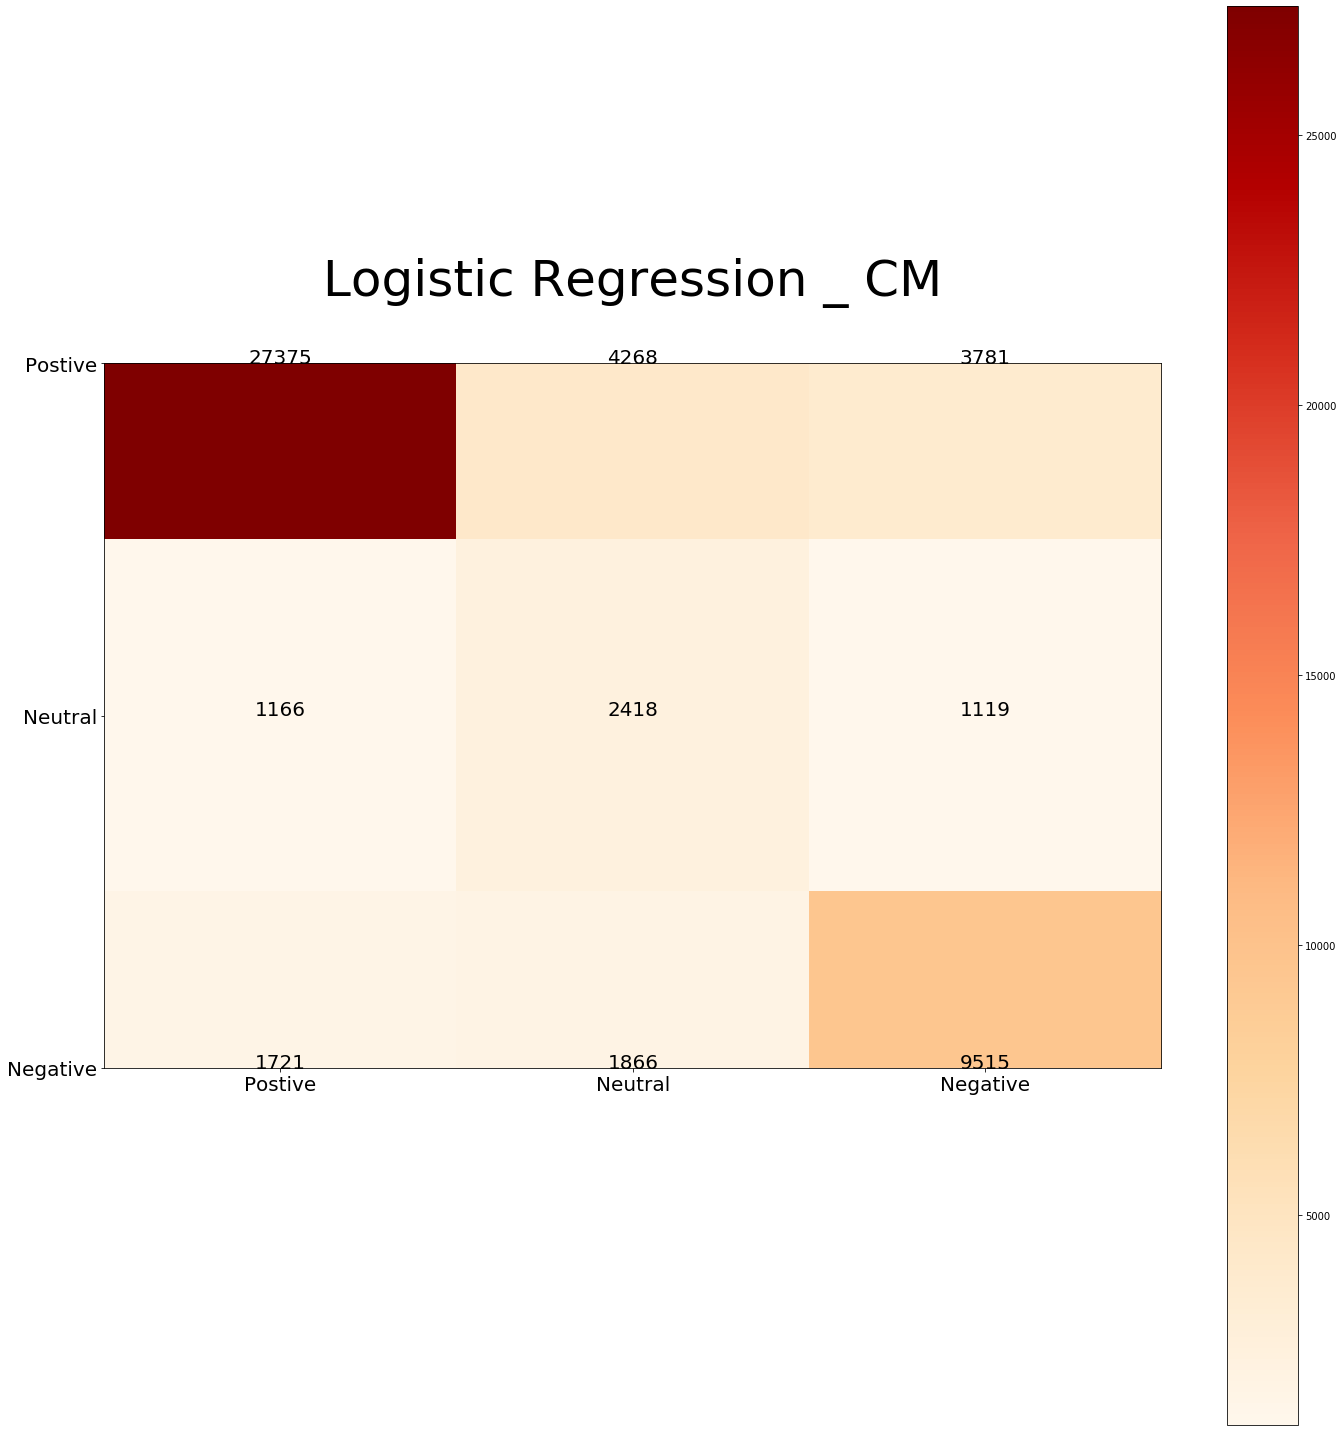

In [120]:
# Plot the confusion matrix for Bag of Words

cm = confusion_matrix(y_test, y_predicted_counts, labels = [1,2,0])
fig = plt.figure(figsize=(20, 20))
plot = plot_confusion_matrix(cm, classes=['Postive','Neutral','Negative'], normalize=False, title='Logistic Regression _ CM\n')
plt.show()


In [121]:
print(cm)

[[27375  4268  3781]
 [ 1166  2418  1119]
 [ 1721  1866  9515]]


In [122]:
from sklearn.naive_bayes import MultinomialNB
import numpy

model = MultinomialNB()
model.fit(X_train_counts, y_train)
fitted = model.fit(X_train_counts, y_train)

y_predicted_countss = model.predict(X_test_counts)


In [123]:
 accuracys =get_metrics(y_test, y_predicted_countss)
    

In [136]:
print ("ACCURACY = ", (accuracys))

ACCURACY =  75.22027466230814


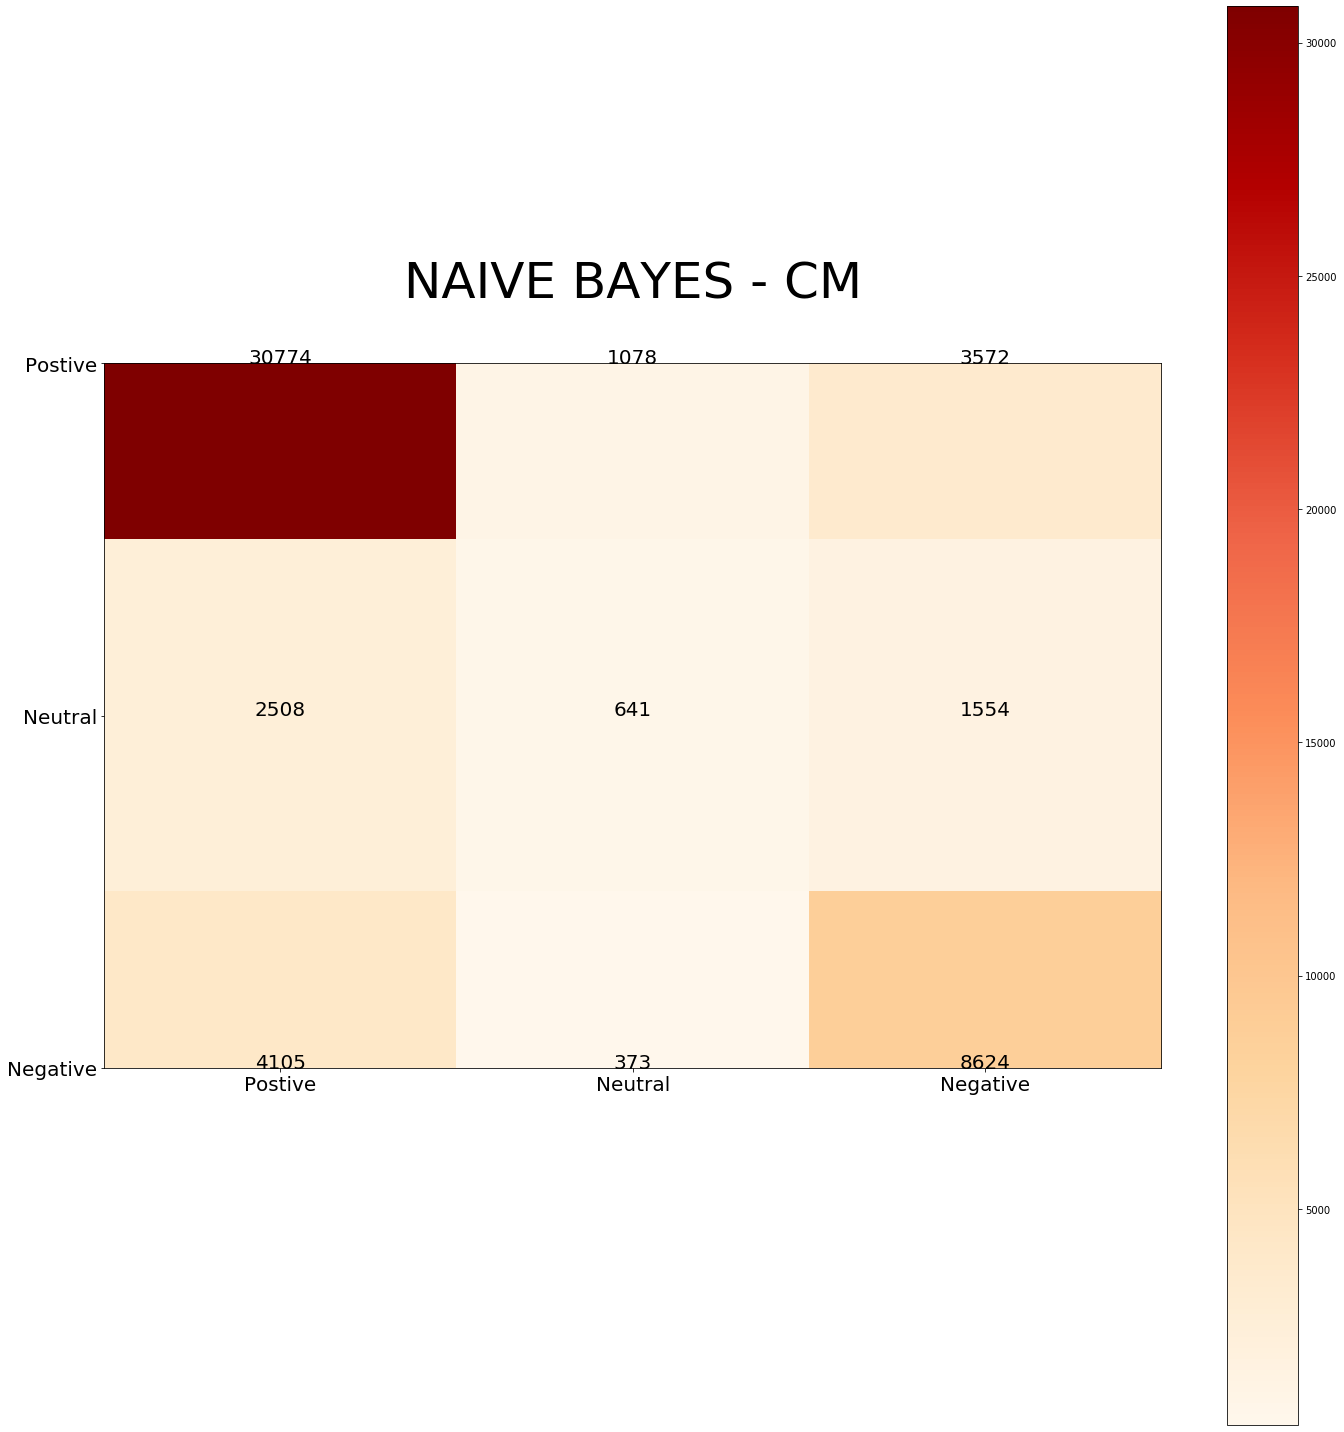

In [125]:
cm2 = confusion_matrix(y_test, y_predicted_countss, labels = [1,2,0])
fig = plt.figure(figsize=(20, 20))
plot = plot_confusion_matrix(cm2, classes=['Postive','Neutral','Negative'], normalize=False, title='NAIVE BAYES - CM\n')
plt.show()

In [126]:
print(cm2)

[[30774  1078  3572]
 [ 2508   641  1554]
 [ 4105   373  8624]]


In [127]:
from xgboost import XGBClassifier

In [128]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [129]:
model_bow.fit(X_train_counts, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [130]:
xgb = model_bow.predict(X_test_counts)

xgb

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [131]:
acc = get_metrics(y_test, xgb)

In [137]:
print("ACCURACY = ",(acc))

ACCURACY =  79.18427924627552


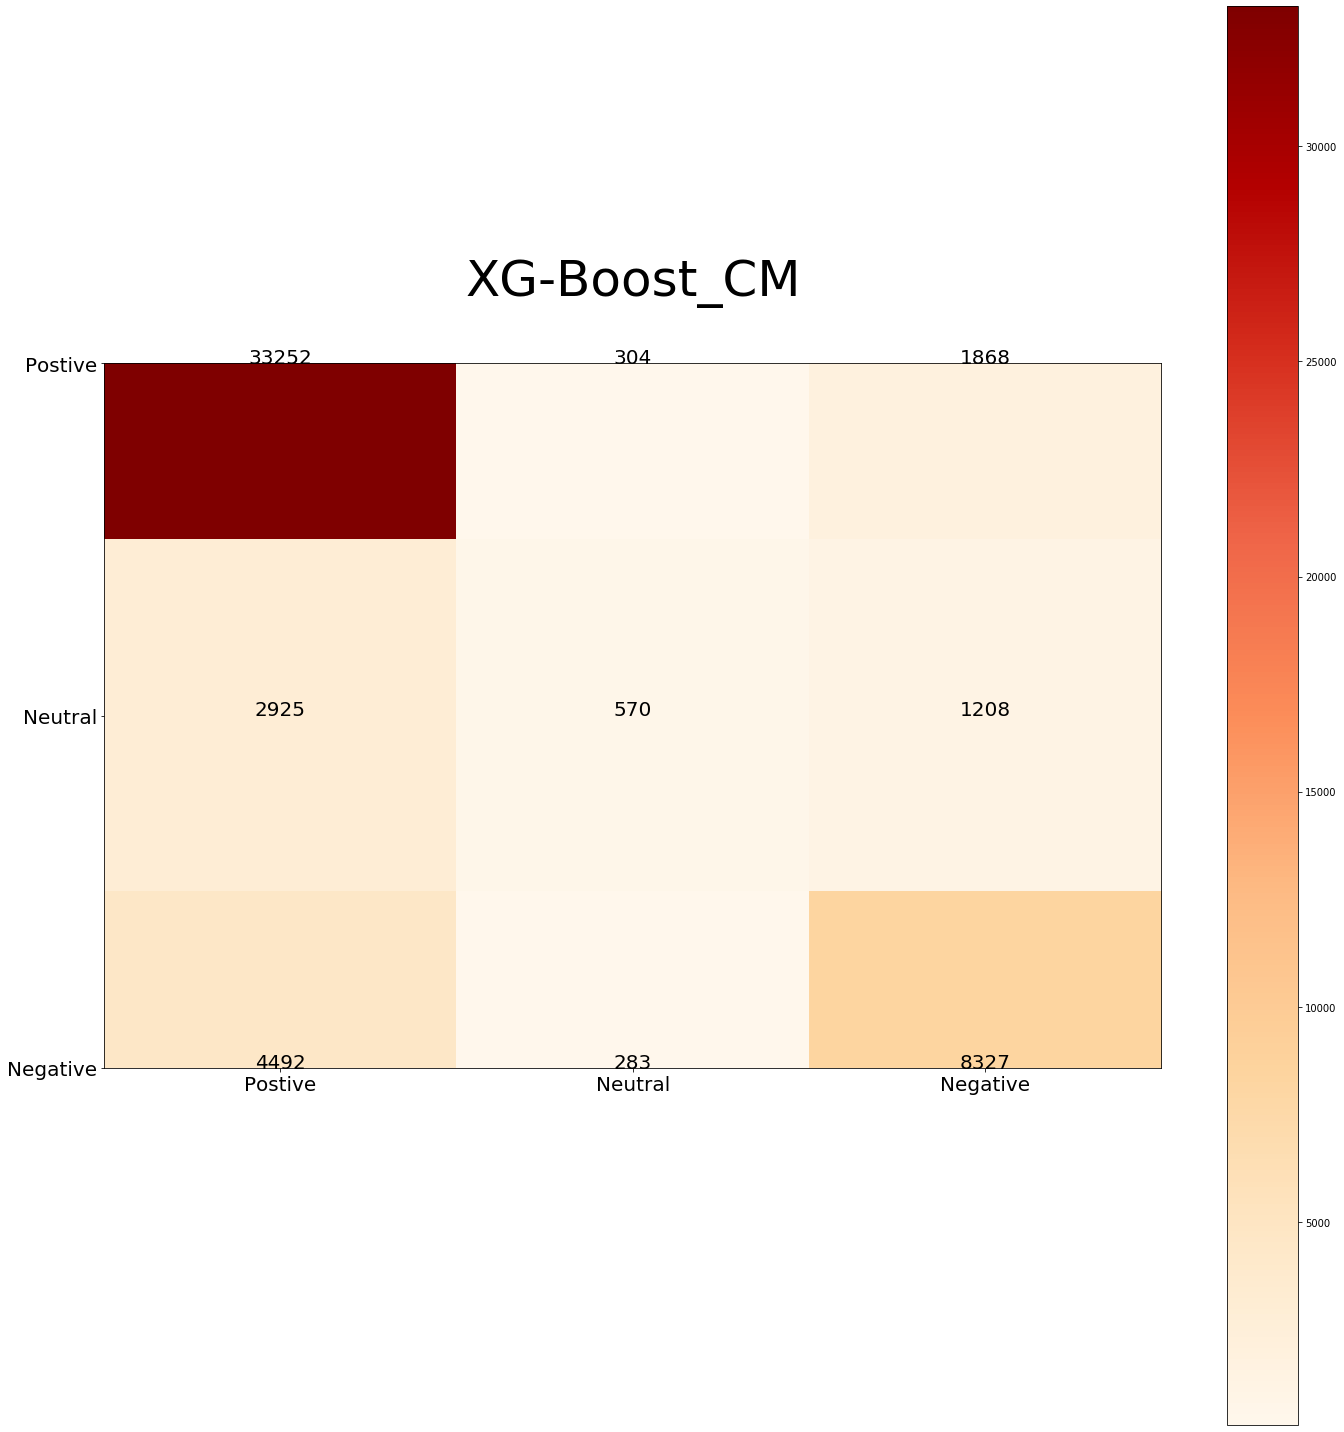

In [133]:
cm3 = confusion_matrix(y_test, xgb, labels = [1,2,0])
fig = plt.figure(figsize=(20, 20))
plot = plot_confusion_matrix(cm3, classes=['Postive','Neutral','Negative'], normalize=False, title='XG-Boost_CM\n')
plt.show()

In [134]:
print(cm3)

[[33252   304  1868]
 [ 2925   570  1208]
 [ 4492   283  8327]]
